In [17]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve, confusion_matrix

import matplotlib.pyplot as plt


from catboost import CatBoostClassifier, Pool

In [2]:
features = pd.read_csv("training_set_features.csv")
labels = pd.read_csv("training_set_labels.csv")
test_data = pd.read_csv("test_set_features.csv")

In [4]:
h1n1_train_data, h1n1_val_data, h1n1_train_labels, h1n1_val_labels = train_test_split(
    features, labels['h1n1_vaccine'],
    test_size= 0.2,
    stratify=labels['h1n1_vaccine'])

In [5]:
def fill_nulls(df):
    for col in df:
        if df[col].dtypes=="object":
            df[col].fillna("other", inplace=True)
        else:
            df[col].fillna(h1n1_train_data[col].mean(), inplace=True)
    return df

In [6]:
h1n1_train_data = fill_nulls(h1n1_train_data)
h1n1_val_data = fill_nulls(h1n1_val_data)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [7]:
cat_features = ['age_group', 'education', 'race', 'sex',
            'income_poverty', 'marital_status',
            'rent_or_own', 'employment_status',
            'hhs_geo_region', 'census_msa',
            'employment_industry', 'employment_occupation']

In [8]:
h1n1_model = CatBoostClassifier(
    eval_metric = "Accuracy",
    iterations = 500,
    learning_rate = 0.03
)
h1n1_model.fit(
    h1n1_train_data, h1n1_train_labels,
    cat_features = cat_features,
    verbose = 100
)

0:	learn: 0.8444184	total: 202ms	remaining: 1m 40s
100:	learn: 0.8561198	total: 3.55s	remaining: 14s
200:	learn: 0.8617365	total: 6.89s	remaining: 10.3s
300:	learn: 0.8652469	total: 10.2s	remaining: 6.73s
400:	learn: 0.8682425	total: 13.6s	remaining: 3.35s
499:	learn: 0.8716125	total: 16.9s	remaining: 0us


In [9]:
h1n1_preds = h1n1_model.predict(h1n1_val_data)
h1n1_prob = h1n1_model.predict_proba(h1n1_val_data)[:,1]
h1n1_acc_score = accuracy_score(h1n1_val_labels, h1n1_preds)
h1n1_auc_score = roc_auc_score(h1n1_val_labels, h1n1_prob)

In [10]:
print("H1N1 Accuracy: ", h1n1_acc_score)
print("H1N1 AUC: ", h1n1_auc_score)

H1N1 Accuracy:  0.8562336203669038
H1N1 AUC:  0.8717662716533907


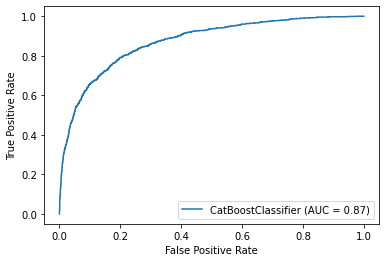

In [15]:
plot_roc_curve(h1n1_model, h1n1_val_data, h1n1_val_labels)  
plt.show()  

In [18]:
# GETTING THE CONFUSION MATRIX
cm1=np.array(confusion_matrix(h1n1_val_labels,h1n1_preds))
print(cm1)

[[4006  201]
 [ 567  568]]


<AxesSubplot:title={'center':'CatBoost H1N1 Vaccine'}>

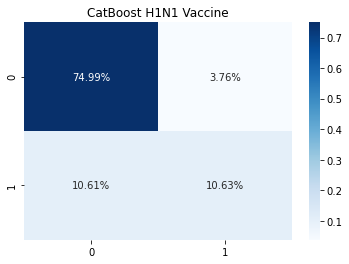

In [30]:
plt.title("CatBoost H1N1 Vaccine")
sns.heatmap(cm1/np.sum(cm1), annot=True, 
            fmt='.2%', cmap='Blues')

SEASONAL MODEL

In [21]:
seasonal_train_data, seasonal_val_data, seasonal_train_labels, seasonal_val_labels = train_test_split(
    features, labels['seasonal_vaccine'],
    test_size= 0.2,
    stratify=labels['seasonal_vaccine'])

In [22]:
seasonal_train_data = fill_nulls(seasonal_train_data)
seasonal_val_data = fill_nulls(seasonal_val_data)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [23]:
seasonal_model = CatBoostClassifier(
    eval_metric = "Accuracy",
    iterations = 500,
    learning_rate = 0.03
)
seasonal_model.fit(
    seasonal_train_data, seasonal_train_labels,
    cat_features = cat_features,
    verbose = 100
)

0:	learn: 0.7520711	total: 33.1ms	remaining: 16.5s
100:	learn: 0.7847414	total: 3.46s	remaining: 13.7s
200:	learn: 0.7934004	total: 6.98s	remaining: 10.4s
300:	learn: 0.7989235	total: 10.6s	remaining: 7.01s
400:	learn: 0.8036040	total: 14s	remaining: 3.45s
499:	learn: 0.8083314	total: 17.4s	remaining: 0us


In [24]:
seasonal_preds = seasonal_model.predict(seasonal_val_data)
seasonal_prob = seasonal_model.predict_proba(seasonal_val_data)[:, 1]
seasonal_acc_score = accuracy_score(seasonal_val_labels, seasonal_preds)
seasonal_auc_score = roc_auc_score(seasonal_val_labels, seasonal_prob)

In [25]:
print("Seasonal Accuracy: ", seasonal_acc_score)
print("Seasonal AUC: ", seasonal_auc_score)

Seasonal Accuracy:  0.7871583676525645
Seasonal AUC:  0.8656388350772528


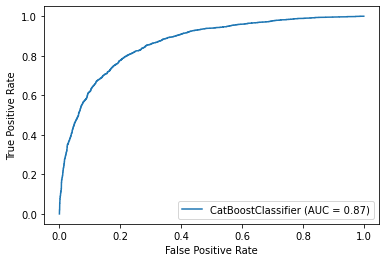

In [26]:
plot_roc_curve(seasonal_model, seasonal_val_data, seasonal_val_labels)  
plt.show()  

In [27]:
# GETTING THE CONFUSION MATRIX
cm2=np.array(confusion_matrix(seasonal_val_labels,seasonal_preds))
print(cm2)

[[2313  542]
 [ 595 1892]]


<AxesSubplot:title={'center':'Catboost Seasonal Vaccine'}>

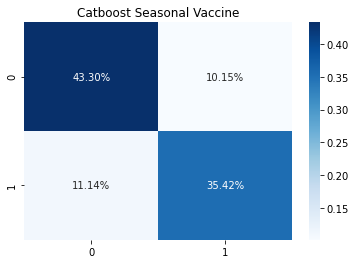

In [28]:
plt.title("Catboost Seasonal Vaccine")
sns.heatmap(cm2/np.sum(cm2), annot=True, 
            fmt='.2%', cmap='Blues')

In [29]:
print("AVG AUC: ", (h1n1_auc_score+seasonal_auc_score)/2)

AVG AUC:  0.8687025533653218
